#### Case 1: Isobaric evaporation of liquid hydrogen in a 4.89 $m^3$ spherical tank experiments.

This notebook sets up the isobaric evaporation of liquid hydrogen ($LH_2$) in a 4.89 $m^3$ storage tank. A high liquid filling, high heat ingress scenario from Hasan (1991) is considered. This tank is representative of lab-scale tanks used for cryogen evaporation experiments that measure boil-off rates and thermal stratification.

In [309]:
# Ensure that python finds the submodules
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

## Module imports
# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

from scipy.integrate import simps

from mpltools import annotation

#### Setup tank and cryogen properties

In [310]:
# LNG tank properties
Q_roof = 0 # Roof heat ingress / W
d_i = 2.106 # Internal diameter / m
d_o = 2.106+2.08e-3   # External diameter / m
T_air = 350 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 0.01063 # W/m2/K up to 0.1-0.2
U_V = 0.01063 # W/m2/K

# Specify heat transfer rate at the bottom to prevent ground heating
Q_b = 0 # W, 

# Spherical tank volume
V_tank = 4.89 #m^3

# Initial liquid filling / Dimensionless
LF = 0.3

# Specify tank operating pressure
P = 117e3 # Pa

Geo_v1 = "spherical"
Geo_l1 = "spherical"

Geo_v2 = "cylindrical"
Geo_l2 = "cylindrical"

# Initialize large-scale tank
small_tank1 = Tank(d_i, d_o, V_tank, Geo_v1, Geo_l1,LF)
small_tank1.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w = 0.7)

small_tank2 = Tank(d_i, d_o, V_tank, Geo_v2, Geo_l2,LF)
small_tank2.set_HeatTransProps(U_L, U_V, T_air, Q_b_fixed=None, Q_roof=Q_roof, eta_w = 0.7)

# Initialise cryogen
hydrogen1 = Cryogen(name = "hydrogen")
hydrogen1.set_coolprops(P)

hydrogen2 = Cryogen(name='hydrogen')
hydrogen2.set_coolprops(P)

# Set cryogen
small_tank1.cryogen = hydrogen1
small_tank2.cryogen = hydrogen2

# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen1.name + " is %.1e kg/h" % (small_tank1.b_l_dot * 3600))
print("The initial evaporation rate of " + hydrogen2.name + " is %.1e kg/h" % (small_tank2.b_l_dot * 3600))

The initial evaporation rate of hydrogen is 3.2e-01 kg/h
The initial evaporation rate of hydrogen is 3.7e-01 kg/h


Calculate initial evaporation rate and transient period

In [311]:
# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen1.name + " is %.1e kg/h" % (small_tank1.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % small_tank1.tau)

# Minimum number of hours to achieve steady state 
tau_h1 = (np.floor(small_tank1.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h1 )

# Calculate boil-off rate
BOR1 = (small_tank1.b_l_dot * 24 * 3600) / (small_tank1.V * small_tank1.LF * small_tank1.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR1 * 100))
print('Area = ',small_tank1.A_T)
print("vz at t=0 = ",small_tank1.v_z,'\n')

# Calculate initial evaporation rate
print("The initial evaporation rate of " + hydrogen2.name + " is %.1e kg/h" % (small_tank2.b_l_dot * 3600))

# Estimate transient period duration
print("Transient period = %.3f s " % small_tank2.tau)

# Minimum number of hours to achieve steady state 
tau_h2 = (np.floor(small_tank2.tau / 3600) + 1)

# Print simulation time of the transient period for short-term storage
print("Simulation time: %.0i h" % tau_h2 )

# Calculate boil-off rate
BOR2 = (small_tank2.b_l_dot * 24 * 3600) / (small_tank2.V * small_tank2.LF * small_tank2.cryogen.rho_L)
print("BOR = %.3f %%" % (BOR2 * 100))
print('Area = ',small_tank2.A_T)
print("vz at t=0 = ",small_tank2.v_z)

The initial evaporation rate of hydrogen is 3.2e-01 kg/h
Transient period = 74051.240 s 
Simulation time: 21 h
BOR = 7.422 %
Area =  3.2227636000819193
vz at t=0 =  1.810972651711789e-05 

The initial evaporation rate of hydrogen is 3.7e-01 kg/h
Transient period = 49915.205 s 
Simulation time: 14 h
BOR = 8.720 %
Area =  3.4834262086342447
vz at t=0 =  1.9686450956147086e-05


#### Simulation setup and execution

In [312]:
# Define vertical spacing
dz = 0.05

# Calculate number of nodes
n_z = 1 + int(np.round(small_tank1.l_V/dz, 0))

print(n_z)

# Define dimensionless computational grid
small_tank1.z_grid = np.linspace(0, 1, n_z)

# Insulated roof
small_tank1.U_roof = 0

# Define evaporation time as twice as the transient period
evap_time = 3600 *tau_h1*0.5
#evap_time = 3600*24*2

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
small_tank1.time_interval = 60

# Time step to plot each vapour temperature profile
small_tank1.plot_interval = evap_time/6

# Simulate the evaporation
small_tank1.evaporate(evap_time)

# Calculate number of nodes
n_z2 = 1 + int(np.round(small_tank2.l_V/dz, 0))

# Define dimensionless computational grid
small_tank2.z_grid = np.linspace(0, 1, n_z2)

# Insulated roof
small_tank2.U_roof = 0

# Define evaporation time as twice as the transient period
evap_time = 3600 *tau_h1*0.5
#evap_time = 3600*24*2

# Time step to record data, relevant for plotting integrated quantities
# such as the vapour to liquid heat transfer rate, Q_VL
small_tank2.time_interval = 60

# Time step to plot each vapour temperature profile
small_tank2.plot_interval = evap_time/6

# Simulate the evaporation
small_tank2.evaporate(evap_time)

28


/home/aeb23/IRP/CryoEvap/notebooks/../cryoevap/storage_tanks/tank.py:472: RuntimeWarning: divide by zero encountered in divide
  vz = self.v_z*(l_L[i]/zed)*(2*self.d_i/2 - l_L[i])/(2*self.d_i/2 - zed)


#### Visualisation of results

#### Vapour temperature

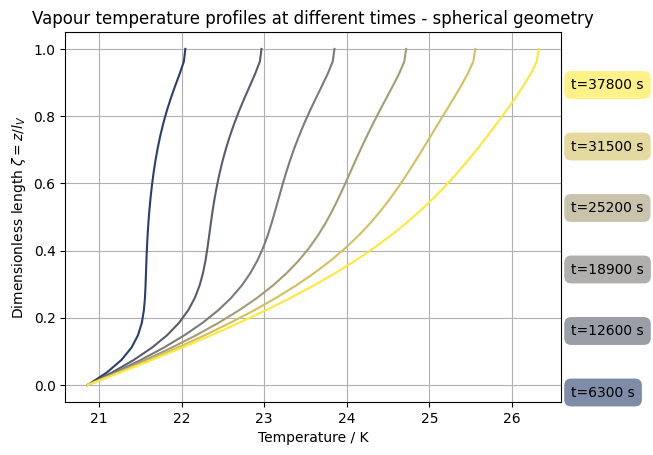

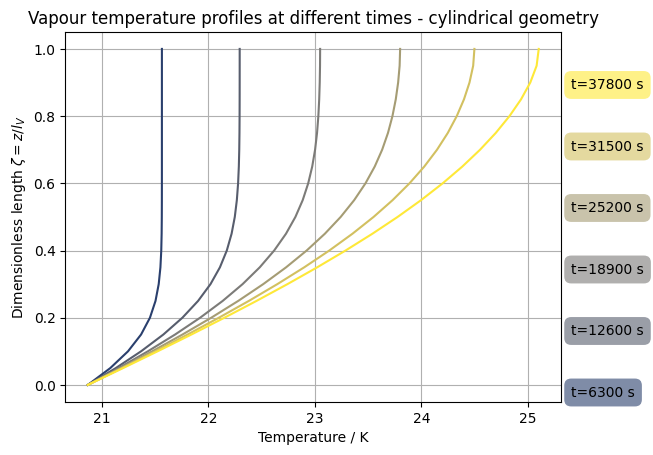

In [313]:
# Visualise the plot
small_tank1.plot_tv()
#plt.ylim((0,0.3))
#plt.xlim((20.86,21))
small_tank2.plot_tv()
#plt.xlim((20.86,21))

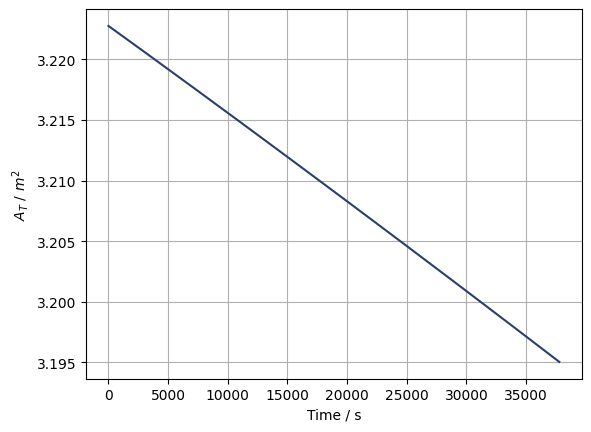

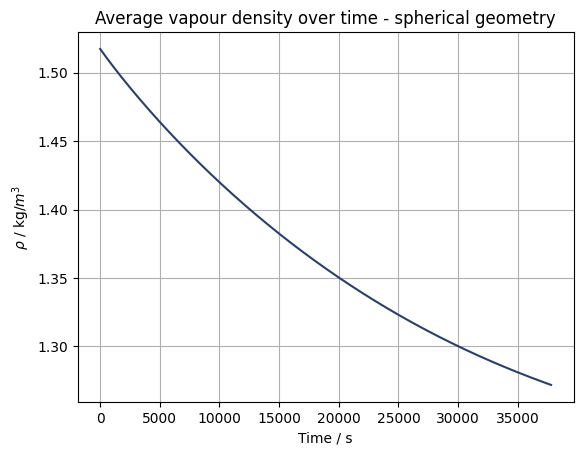

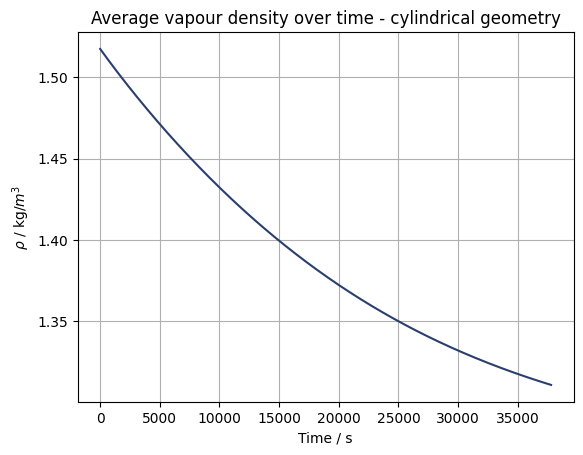

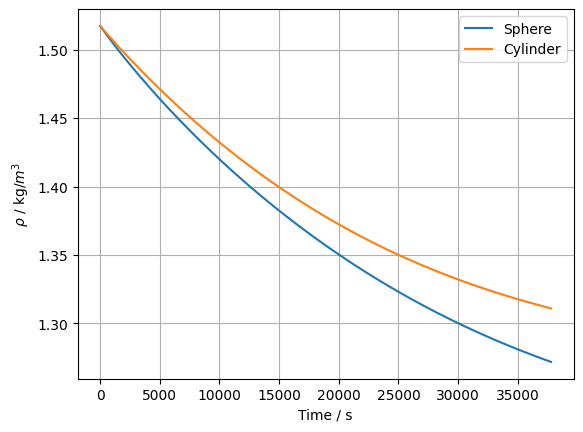

In [314]:
small_tank1.plot_A_T()
small_tank1.plot_rho_V_avg()
small_tank2.plot_rho_V_avg()
plt.plot(small_tank1.data['Time'],small_tank1.data['rho_V_avg'],small_tank2.data['Time'],small_tank2.data['rho_V_avg'])
plt.legend(['Sphere','Cylinder'])
plt.xlabel('Time / s')
plt.ylabel(r'$\rho$ / kg/$m^3$')
plt.grid(True)

Visualise liquid and vapour heat ingresses, $\dot{Q}_{\text{L}}$ and  $\dot{Q}_{\text{V}}$.

The plot also shows the vapour to liquid heat ingress, $\dot{Q}_{VL}$, and  the partition of the vapour heat ingress that is transferred to the interface by the wall directly, $\dot{Q}_{\text{V,w}}$

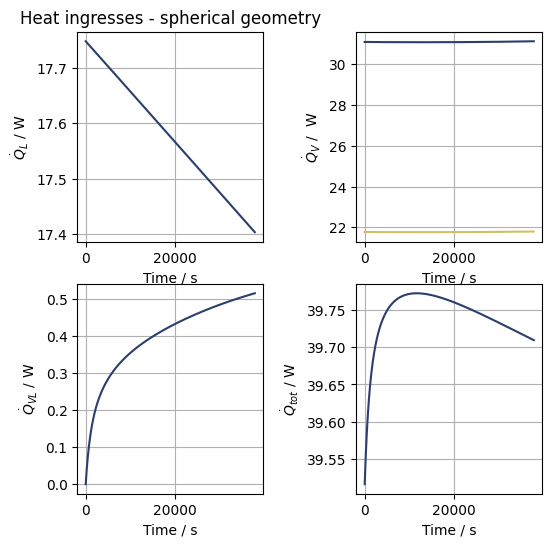

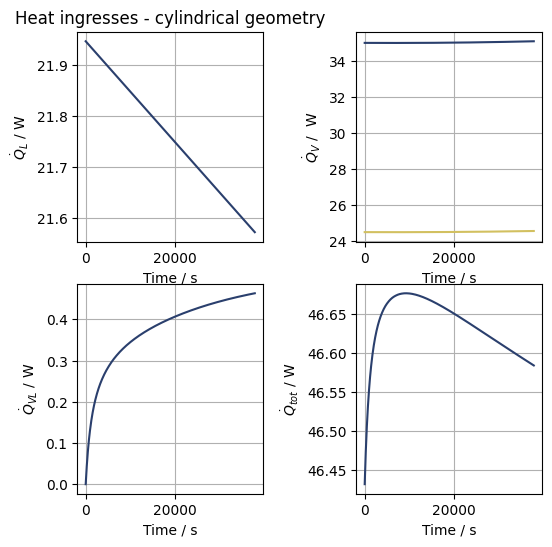

In [315]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_Q(unit="W")
small_tank2.plot_Q(unit='W')

#### Plot liquid volume

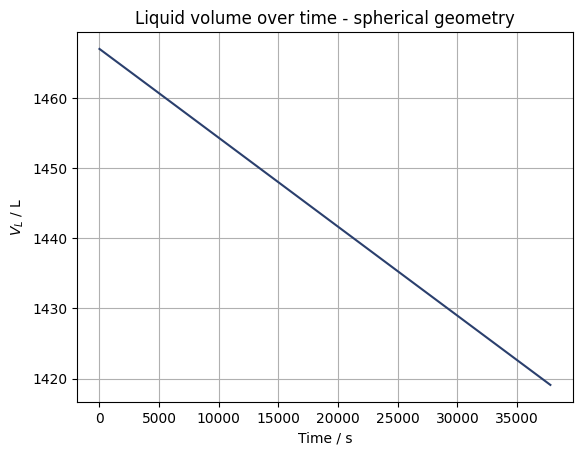

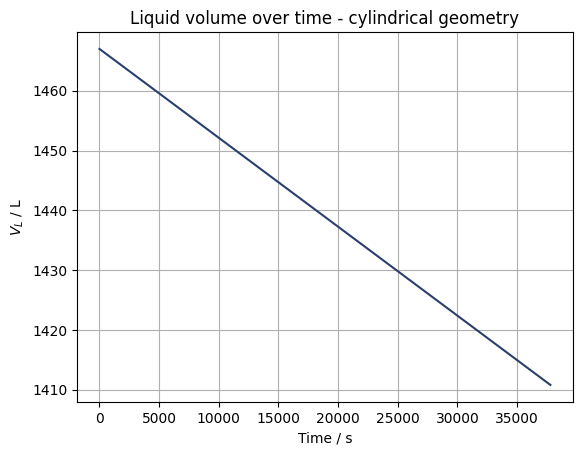

Text(0, 0.5, '$V_L$ / $m^3$')

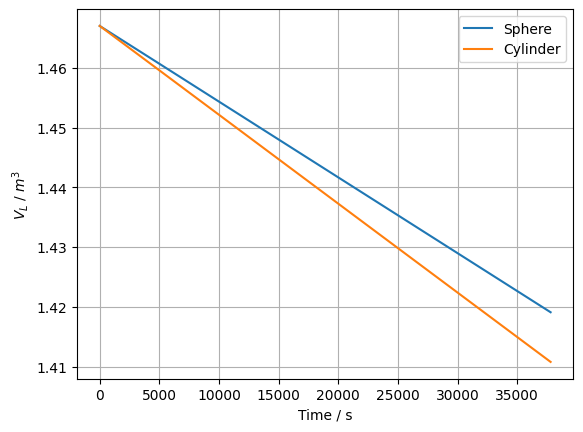

In [316]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_V_L(unit="L")
small_tank2.plot_V_L(unit='L')
plt.plot(small_tank1.data['Time'],small_tank1.data['V_L'],small_tank2.data['Time'],small_tank2.data['V_L'])
plt.grid(True)
plt.legend(['Sphere','Cylinder'])
plt.xlabel('Time / s')
plt.ylabel('$V_L$ / $m^3$')

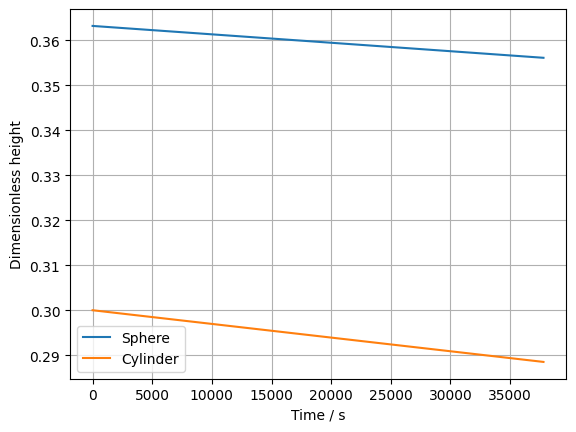

In [317]:
plt.plot(small_tank1.data['Time'],small_tank1.data['z']/d_i,small_tank2.data['Time'],small_tank2.data['z']*np.pi*d_i**2 / (4 * V_tank))
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('Dimensionless height')
plt.legend(['Sphere','Cylinder'])

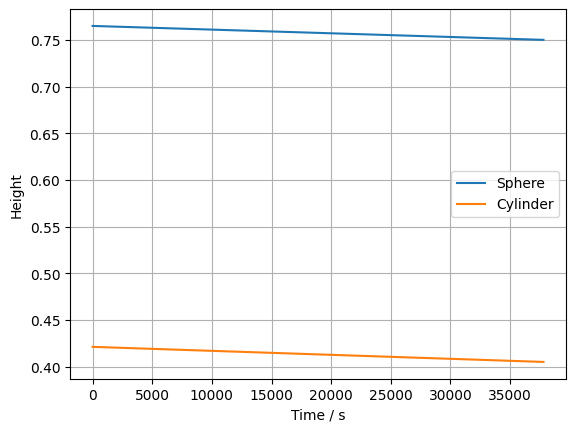

In [318]:
plt.plot(small_tank1.data['Time'],small_tank1.data['z'],small_tank2.data['Time'],small_tank2.data['z'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('Height')
plt.legend(['Sphere','Cylinder'])

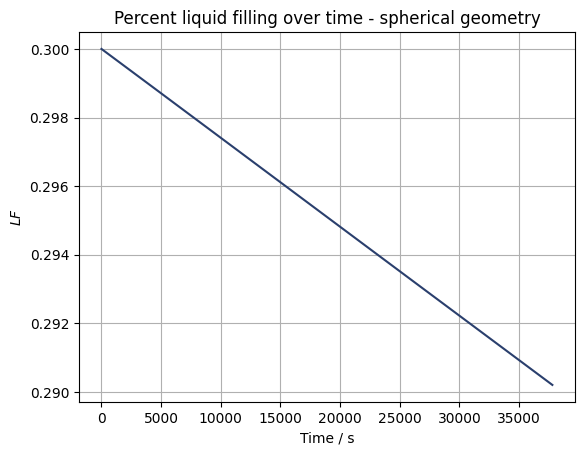

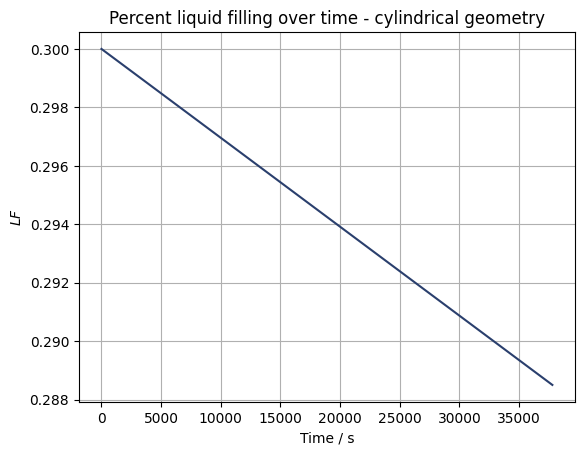

Text(0, 0.5, 'LF')

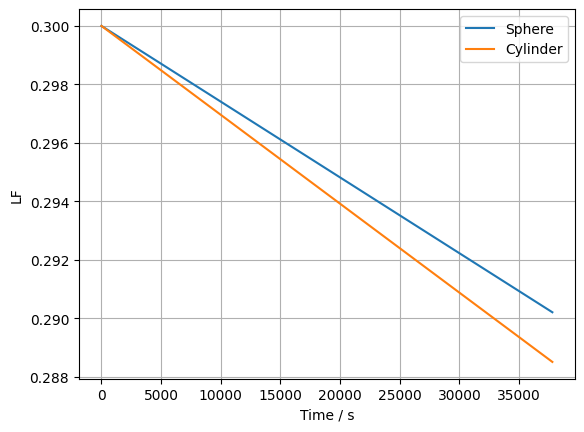

In [319]:
small_tank1.plot_LF()
small_tank2.plot_LF()
plt.plot(small_tank1.data['Time'],small_tank1.data['LF'],small_tank2.data['Time'],small_tank2.data['LF'])
plt.legend(['Sphere','Cylinder'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('LF')
#plt.ylim((0,1))

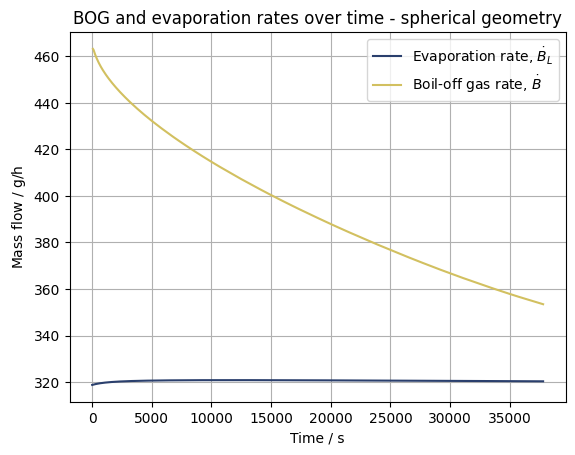

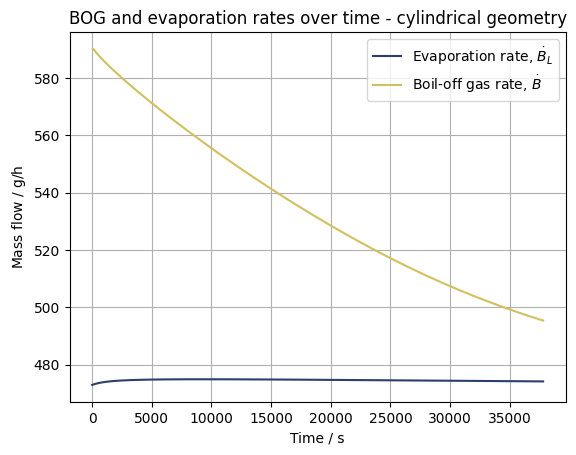

In [320]:
# Provide optional parameter unit to
# accommodate the scale of the experiment
small_tank1.plot_BOG(unit='g/h')
small_tank2.plot_BOG(unit='g/h')

/home/aeb23/IRP/CryoEvap/notebooks/../cryoevap/storage_tanks/plots.py:258: RuntimeWarning: divide by zero encountered in divide
  v_z = tank.v_z*(height/zed)*(2*tank.d_i/2 - height)/(2*tank.d_i/2 - zed)


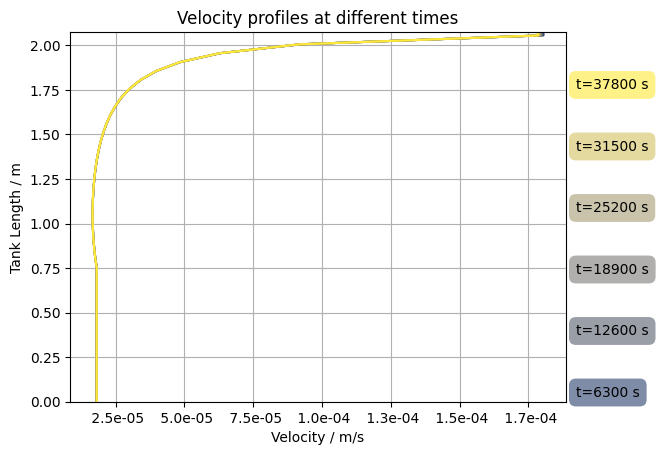

In [321]:
small_tank1.plot_vz()

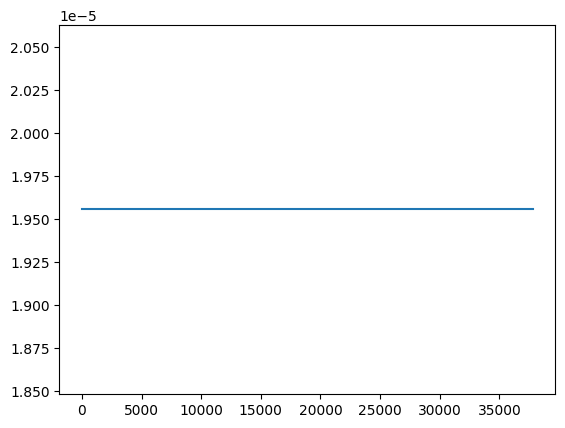

In [322]:
plt.plot(small_tank2.data['Time'],small_tank2.data['vz'])

In [323]:
small_tank1.data["Pressure"] = np.ones_like(small_tank1.data["B_L"])*P
air = P*(V_tank*(1-LF))/(8.314*hydrogen1.T_sat)
for i in range(1,len(small_tank1.data["B_L"])):
    small_tank1.data["Pressure"][i] = ((simps(small_tank1.data["B_L"][:i])*(1000/2) +air)*8.314*small_tank1.data["Tv_avg"][i])/(V_tank - small_tank1.data["V_L"][i])

Optional: CSV data export

If evaporation data is intended to be post-processed in another software, it can be exported readily with the help of the Pandas package.

In [324]:
# Import pandas 
import pandas as pd

In [325]:
# Create dataframe from dictionary
df_evap = pd.DataFrame.from_dict(small_tank1.data)
df_evap2 = pd.DataFrame.from_dict(small_tank2.data)
# Save file to the current working directory
df_evap.to_csv('LN2_small_m3.csv')

In [326]:
df_evap['flux_v'] = df_evap["Q_V"]/(np.pi*d_i*(d_i-df_evap['z']))
df_evap['flux_l'] = df_evap["Q_L"]/(np.pi*d_i*(df_evap['z']))
df_evap['total_flux'] = (df_evap['Q_L']+df_evap['Q_V'])/(np.pi*d_i**2)

In [327]:
df_evap.head()

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,...,A_T,vz_avg,vz,LF,dTV_avg,Q_Vw,Pressure,flux_v,flux_l,total_flux
0,0.0,20.866191,1.517286,-2.066294e-15,17.748723,31.097367,1.467000,0.000089,0.000089,0.000000,...,3.222764,0.000024,0.000018,0.300000,0.000000,21.768157,117000.000000,3.504864,3.506909,3.505607
1,60.0,20.873864,1.516550,1.123792e-02,17.748180,31.097186,1.466924,0.000089,0.000129,-0.000012,...,3.222721,0.000024,0.000018,0.299985,0.000127,21.768030,117040.434262,3.504782,3.506909,3.505555
2,120.0,20.881486,1.515814,2.185277e-02,17.747636,31.097010,1.466849,0.000089,0.000129,-0.000012,...,3.222679,0.000024,0.000018,0.299969,0.000127,21.767907,117082.829026,3.504701,3.506910,3.505503
3,180.0,20.889062,1.515084,3.189033e-02,17.747092,31.096837,1.466773,0.000089,0.000128,-0.000012,...,3.222636,0.000024,0.000018,0.299954,0.000126,21.767786,117124.969915,3.504620,3.506910,3.505452
4,240.0,20.896598,1.514358,4.139298e-02,17.746548,31.096669,1.466698,0.000089,0.000128,-0.000012,...,3.222594,0.000024,0.000018,0.299938,0.000125,21.767668,117166.882620,3.504540,3.506910,3.505401


In [328]:
df_evap["SCHM BOG"] = ((df_evap["BOG"]*1000*3600/2)*(273+15)*8.314)/101325
df_evap2["SCHM BOG"] = ((df_evap2["BOG"]*1000*3600/2)*(273+15)*8.314)/101325
df_evap[-5:]

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,...,vz_avg,vz,LF,dTV_avg,Q_Vw,Pressure,flux_v,flux_l,total_flux,SCHM BOG
626,37560.0,24.126603,1.272684,0.514085,17.405034,31.129600,1.419400,0.000089,0.000098,-0.000003,...,0.000024,0.000018,0.290266,0.000055,21.790720,135034.709814,3.470115,3.507003,3.483254,4.180653
627,37620.0,24.129912,1.272496,0.514295,17.404483,31.129830,1.419324,0.000089,0.000098,-0.000003,...,0.000024,0.000018,0.290250,0.000055,21.790881,135052.844146,3.470080,3.507004,3.483231,4.179637
628,37680.0,24.133215,1.272308,0.514505,17.403932,31.130060,1.419248,0.000089,0.000098,-0.000003,...,0.000024,0.000018,0.290235,0.000055,21.791042,135070.947979,3.470045,3.507004,3.483208,4.178594
629,37740.0,24.136512,1.272120,0.514715,17.403381,31.130290,1.419172,0.000089,0.000098,-0.000003,...,0.000024,0.000018,0.290219,0.000055,21.791203,135089.017749,3.470009,3.507004,3.483185,4.177511
630,37800.0,24.139804,1.271933,0.514924,17.402830,31.130521,1.419096,0.000089,0.000098,-0.000003,...,0.000024,0.000018,0.290204,0.000055,21.791365,135107.053302,3.469974,3.507004,3.483162,4.176426


In [329]:
df_evap2.columns

Index(['Time', 'Tv_avg', 'rho_V_avg', 'Q_VL', 'Q_L', 'Q_V', 'V_L', 'B_L',
       'BOG', 'drho_V_avg', 'dV_L', 'z', 'vz', 'LF', 'dTV_avg', 'Q_Vw',
       'SCHM BOG'],
      dtype='object')

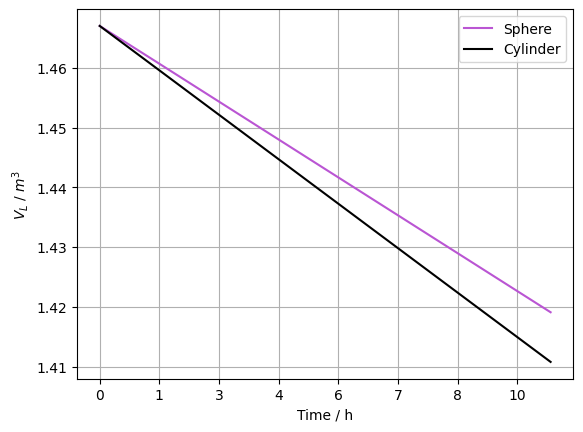

In [330]:
plt.plot(df_evap['Time'],df_evap['V_L'],color='mediumorchid')
plt.plot(df_evap2['Time'],df_evap2['V_L'],'k')
plt.grid(True)
xloc = plt.xticks()[0]
plt.xticks([round(i,1) for i in xloc[1:-1]],[round(i/3600) for i in xloc[1:-1]])
plt.xlabel('Time / h')
plt.ylabel('$V_{L}$ / $m^{3}$')
plt.legend(['Sphere','Cylinder'])

Text(0, 0.5, 'Mass Flow / g/h')

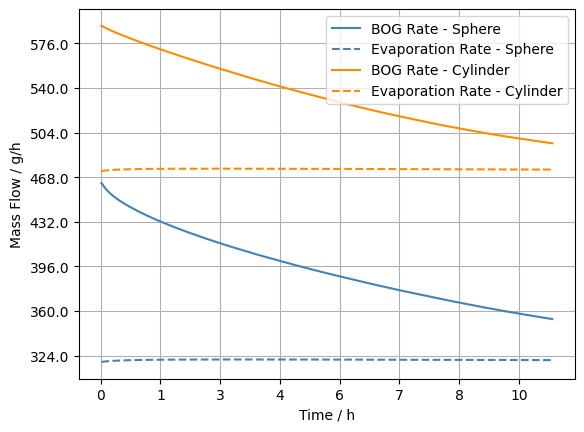

In [331]:
plt.plot(df_evap['Time'][1:],df_evap['BOG'][1:],'-',color='steelblue')
plt.plot(df_evap['Time'][1:],df_evap['B_L'][1:],'--',color='steelblue')
plt.plot(df_evap2['Time'][1:],df_evap2['BOG'][1:],'darkorange')
plt.plot(df_evap2['Time'][1:],df_evap2['B_L'][1:],'--',color='darkorange')
plt.legend(['BOG Rate - Sphere','Evaporation Rate - Sphere','BOG Rate - Cylinder','Evaporation Rate - Cylinder'])
yloc = plt.yticks()[0]
xloc = plt.xticks()[0]
plt.xticks([round(i,1) for i in xloc[1:-1]],[round(i/3600) for i in xloc[1:-1]])
plt.yticks([i for i in yloc[1:-1]],[round(i*3600*1000,2) for i in yloc[1:-1]])
plt.grid(True)
plt.xlabel('Time / h')
plt.ylabel('Mass Flow / g/h')

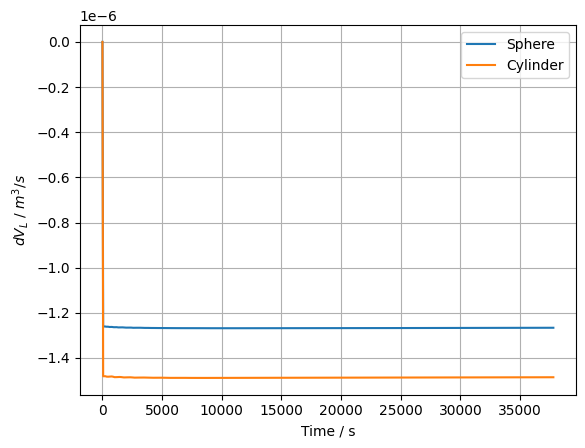

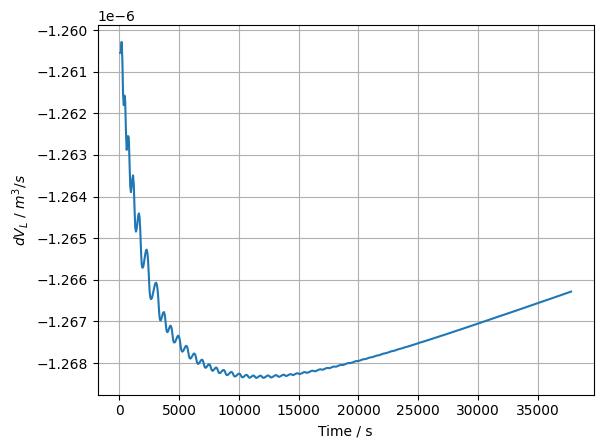

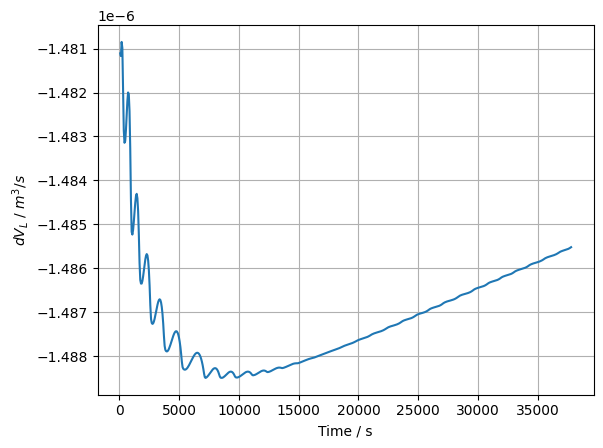

In [332]:
plt.plot(df_evap['Time'],df_evap['dV_L'],df_evap2['Time'],df_evap2['dV_L'])
plt.legend(['Sphere','Cylinder'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.figure()
plt.plot(df_evap['Time'][1:],df_evap['dV_L'][1:])
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.grid(True)
plt.figure()
plt.plot(df_evap2['Time'][1:],df_evap2['dV_L'][1:])
plt.xlabel('Time / s')
plt.ylabel('$dV_L$ / $m^3/s$')
plt.grid(True)

In [333]:
assert(df_evap['Time']==df_evap2['Time']).all()

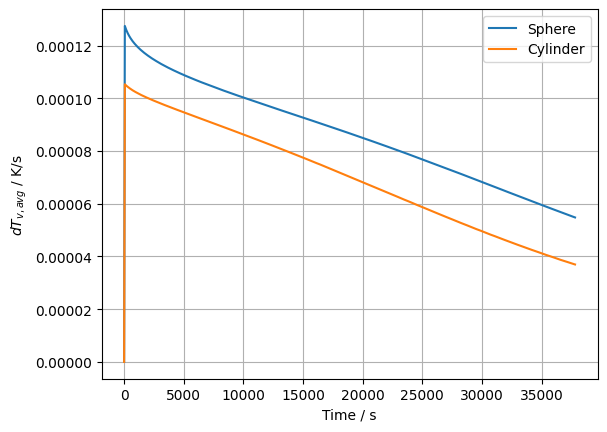

In [334]:
plt.plot(df_evap['Time'],df_evap['dTV_avg'])
plt.plot(df_evap2['Time'],df_evap2['dTV_avg'])
plt.grid(True)
plt.xlabel('Time / s')
plt.ylabel('$dT_{v, avg}$ / K/s')
plt.legend(['Sphere','Cylinder'])

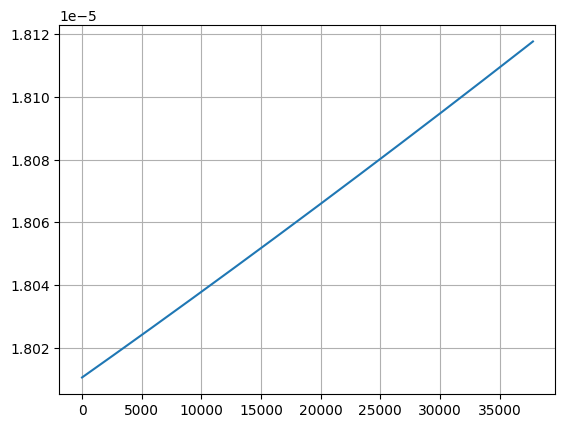

In [335]:
plt.plot(small_tank1.data['Time'],small_tank1.data['vz'])
plt.grid(True)

In [336]:
df_evap.head()

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,...,vz_avg,vz,LF,dTV_avg,Q_Vw,Pressure,flux_v,flux_l,total_flux,SCHM BOG
0,0.0,20.866191,1.517286,-2.066294e-15,17.748723,31.097367,1.467000,0.000089,0.000089,0.000000,...,0.000024,0.000018,0.300000,0.000000,21.768157,117000.000000,3.504864,3.506909,3.505607,3.766763
1,60.0,20.873864,1.516550,1.123792e-02,17.748180,31.097186,1.466924,0.000089,0.000129,-0.000012,...,0.000024,0.000018,0.299985,0.000127,21.768030,117040.434262,3.504782,3.506909,3.505555,5.472308
2,120.0,20.881486,1.515814,2.185277e-02,17.747636,31.097010,1.466849,0.000089,0.000129,-0.000012,...,0.000024,0.000018,0.299969,0.000127,21.767907,117082.829026,3.504701,3.506910,3.505503,5.466840
3,180.0,20.889062,1.515084,3.189033e-02,17.747092,31.096837,1.466773,0.000089,0.000128,-0.000012,...,0.000024,0.000018,0.299954,0.000126,21.767786,117124.969915,3.504620,3.506910,3.505452,5.455417
4,240.0,20.896598,1.514358,4.139298e-02,17.746548,31.096669,1.466698,0.000089,0.000128,-0.000012,...,0.000024,0.000018,0.299938,0.000125,21.767668,117166.882620,3.504540,3.506910,3.505401,5.445030


In [337]:
df_evap2.head()

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,dV_L,z,vz,LF,dTV_avg,Q_Vw,SCHM BOG
0,0.0,20.866191,1.517289,-2.277361e-15,21.945558,34.980473,1.467000,0.000131,0.000131,0.00000,0.000000,0.421137,0.00002,0.300000,0.000000,24.486331,5.587614
1,60.0,20.872518,1.516680,1.201061e-02,21.944967,34.980391,1.466911,0.000131,0.000164,-0.00001,-0.000001,0.421112,0.00002,0.299982,0.000105,24.486274,6.972443
2,120.0,20.878828,1.516070,2.330732e-02,21.944376,34.980312,1.466822,0.000131,0.000164,-0.00001,-0.000001,0.421086,0.00002,0.299964,0.000105,24.486218,6.971030
3,180.0,20.885123,1.515463,3.394539e-02,21.943785,34.980234,1.466733,0.000131,0.000164,-0.00001,-0.000001,0.421061,0.00002,0.299945,0.000105,24.486164,6.967168
4,240.0,20.891404,1.514857,4.397587e-02,21.943194,34.980157,1.466645,0.000131,0.000164,-0.00001,-0.000001,0.421035,0.00002,0.299927,0.000105,24.486110,6.963393


In [338]:
df_evap[-5:]

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,...,vz_avg,vz,LF,dTV_avg,Q_Vw,Pressure,flux_v,flux_l,total_flux,SCHM BOG
626,37560.0,24.126603,1.272684,0.514085,17.405034,31.129600,1.419400,0.000089,0.000098,-0.000003,...,0.000024,0.000018,0.290266,0.000055,21.790720,135034.709814,3.470115,3.507003,3.483254,4.180653
627,37620.0,24.129912,1.272496,0.514295,17.404483,31.129830,1.419324,0.000089,0.000098,-0.000003,...,0.000024,0.000018,0.290250,0.000055,21.790881,135052.844146,3.470080,3.507004,3.483231,4.179637
628,37680.0,24.133215,1.272308,0.514505,17.403932,31.130060,1.419248,0.000089,0.000098,-0.000003,...,0.000024,0.000018,0.290235,0.000055,21.791042,135070.947979,3.470045,3.507004,3.483208,4.178594
629,37740.0,24.136512,1.272120,0.514715,17.403381,31.130290,1.419172,0.000089,0.000098,-0.000003,...,0.000024,0.000018,0.290219,0.000055,21.791203,135089.017749,3.470009,3.507004,3.483185,4.177511
630,37800.0,24.139804,1.271933,0.514924,17.402830,31.130521,1.419096,0.000089,0.000098,-0.000003,...,0.000024,0.000018,0.290204,0.000055,21.791365,135107.053302,3.469974,3.507004,3.483162,4.176426


In [339]:
df_evap2[-5:]

,Time,Tv_avg,rho_V_avg,Q_VL,Q_L,Q_V,V_L,B_L,BOG,drho_V_avg,dV_L,z,vz,LF,dTV_avg,Q_Vw,SCHM BOG
626,37560.0,23.503820,1.311571,0.462788,21.574018,35.068707,1.411144,0.000132,0.000138,-0.000002,-0.000001,0.405102,0.00002,0.288578,0.000037,24.548095,5.856651
627,37620.0,23.506056,1.311435,0.462918,21.573425,35.069055,1.411055,0.000132,0.000138,-0.000002,-0.000001,0.405077,0.00002,0.288559,0.000037,24.548338,5.855733
628,37680.0,23.508286,1.311298,0.463047,21.572832,35.069404,1.410966,0.000132,0.000138,-0.000002,-0.000001,0.405051,0.00002,0.288541,0.000037,24.548582,5.854837
629,37740.0,23.510511,1.311162,0.463176,21.572240,35.069753,1.410877,0.000132,0.000138,-0.000002,-0.000001,0.405026,0.00002,0.288523,0.000037,24.548827,5.853965
630,37800.0,23.512731,1.311027,0.463305,21.571647,35.070102,1.410788,0.000132,0.000138,-0.000002,-0.000001,0.405000,0.00002,0.288505,0.000037,24.549072,5.853106


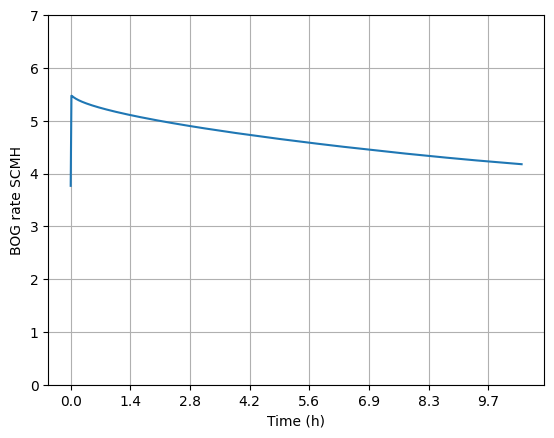

In [340]:
plt.plot(df_evap['Time'],df_evap['SCHM BOG'])
plt.ylim((0,7))
plt.ylabel('BOG rate SCMH')
plt.xlabel('Time (h)')
loc = plt.xticks()[0]
plt.xticks([round(i) for i in loc[1:-1]],[round(i/3600,1) for i in loc[1:-1]])
plt.grid(True)

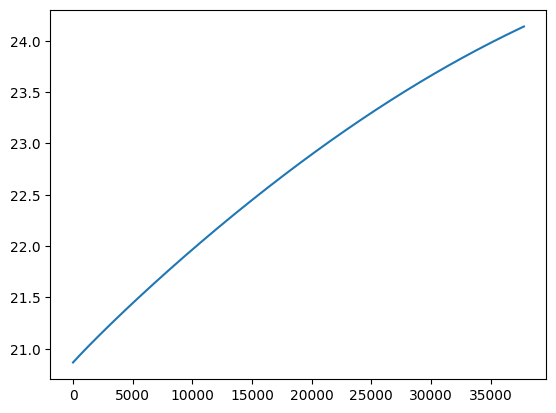

In [341]:
plt.plot(df_evap['Time'],df_evap['Tv_avg'])

In [342]:
df_evap['z']

0      0.764952
1      0.764929
2      0.764905
3      0.764882
4      0.764858
         ...   
626    0.750119
627    0.750096
628    0.750072
629    0.750048
630    0.750024
Name: z, Length: 631, dtype: float64

#### References



Hasan, M., Lin, C. and Van Dresar, N. (1991). Self-Pressurization of a Flightweight Liquid Hydrogen Storage Tank Subjected to Low Heat Flux. [online] Available at: https://ntrs.nasa.gov/api/citations/19910011011/downloads/19910011011.pdf [Accessed 2 Jul. 2024].

Wang, Z. and Mérida, W. (2024). Thermal performance of cylindrical and spherical liquid hydrogen tanks. International Journal of Hydrogen Energy, 53, pp.667–683. doi:https://doi.org/10.1016/j.ijhydene.2023.11.287.